This is a python-notebook for creating the plots of the evaluation for my bachelor thesis.

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import textwrap

# Set the root directory for the data
root = f'stored_runs/run4/'

# Stacked Bar Chart

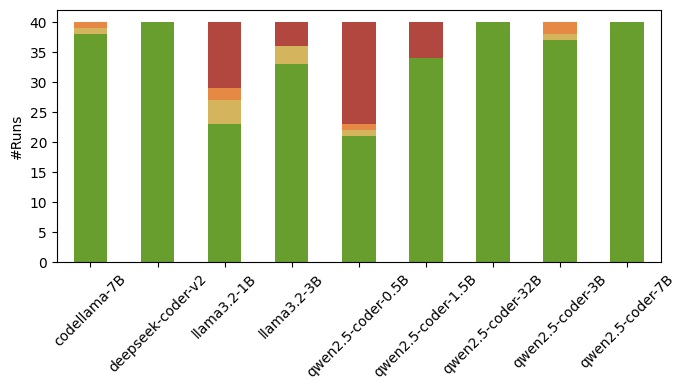

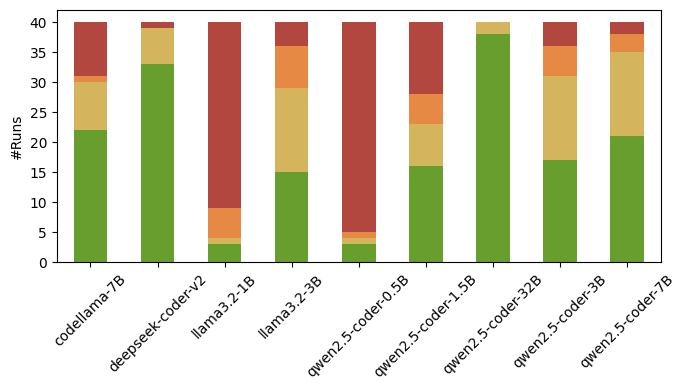

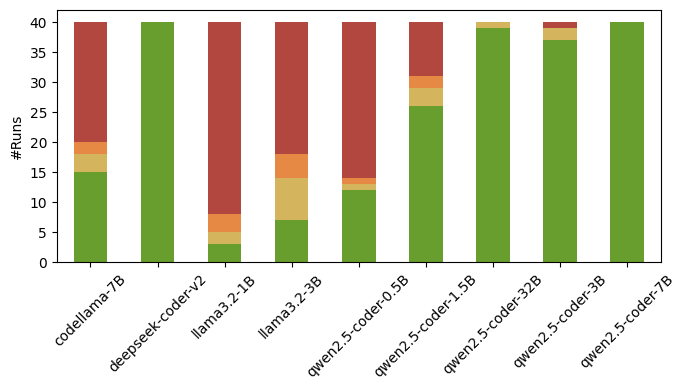

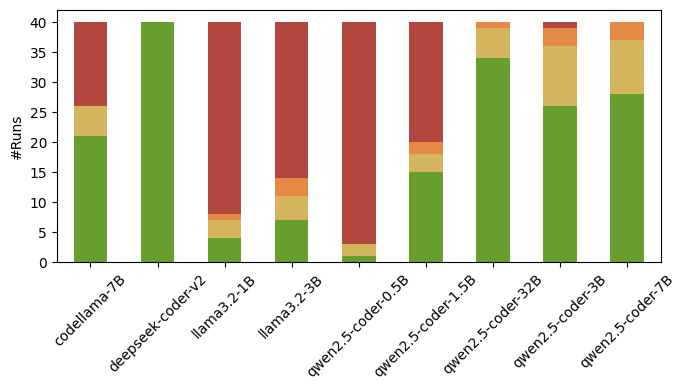

In [326]:
test_case_names = ['image', 'void', 'page_rank', 'connected_components']

# Define the colors for each revision category
category_colors = {
    '0 repair attempts needed': '#679e2d',
    '1 repair attempt needed': '#D4B45C',
    '2 repair attempts needed': '#E68945',
    'Not repaired after 2 revisions': '#b24740'
}


# Loop over each test case and generate a bar chart
for test_case_name in test_case_names:
    # Read the CSV file for each test case
    df = pd.read_csv(f'{root}/{test_case_name}/code_execution_results.csv', sep=',')

    # Apply the revision categories
    df['Revision Category'] = df['Revisions'].apply(lambda x: '0 repair attempts needed' if x == 0 else 
                                                    '1 repair attempt needed' if x == 1 else
                                                    '2 repair attempts needed' if x == 2 else 
                                                    'Not repaired after 2 attempts')

    # Handle errors (assume these are in the 'Error' column)
    df.loc[df['Error'].notna(), 'Revision Category'] = 'Not repaired after 2 revisions'

    # Count occurrences by model and revision category
    summary = df.groupby(['Model', 'Revision Category']).size().unstack(fill_value=0)

    # Filter for specific models
    # summary = summary.loc[['llama3.2-1B', 'codellama-7B', 'qwen2.5-coder-32B',], :]
        
    # Ensure all categories are included in the plot and legend
    for category in category_colors:
        if category not in summary.columns:
            # Add missing categories with zero count
            summary[category] = 0

    # Plot with adjusted colors for each category
    ax = summary.plot(kind='bar', stacked=True, figsize=(7, 4), color=[category_colors[col] for col in summary.columns], legend=False)

    # Add labels and title
    plt.xlabel(None)
    plt.ylabel('#Runs')
    plt.xticks(rotation=45)

    # plt.legend(
    #     title='Revision Category',
    #     bbox_to_anchor=(1, 1),  # Place the legend to the right of the chart
    #     loc='upper left',
    #     fontsize=10
    # )

    # Adjust layout to ensure everything fits
    plt.tight_layout()

    # Save the plot as an image
    plt.savefig(f'{root}/{test_case_name}_Barchart.png')

    # Show the plot
    plt.show()

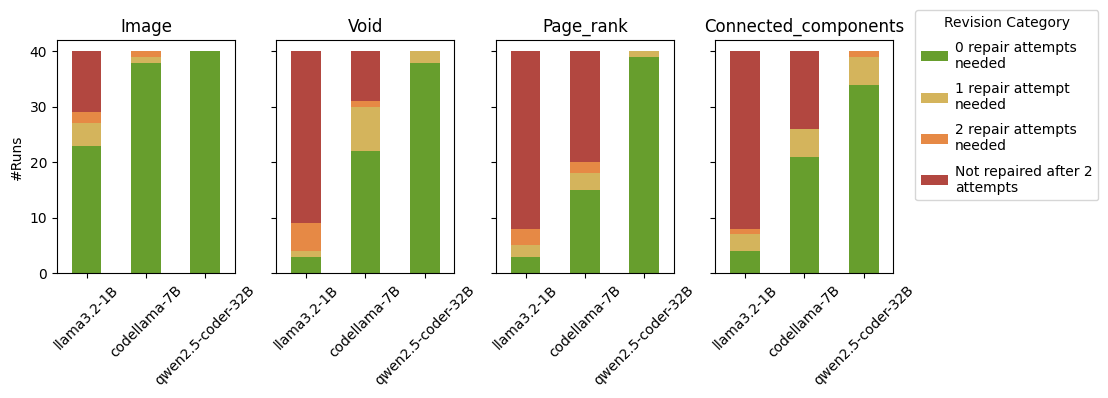

In [327]:
# Define test case names and category colors
test_case_names = ['image', 'void', 'page_rank', 'connected_components']
category_colors = {
    '0 repair attempts needed': '#679e2d',
    '1 repair attempt needed': '#D4B45C',
    '2 repair attempts needed': '#E68945',
    'Not repaired after 2 attempts': '#b24740'
}

# Create a figure with subplots (one subplot per test case)
fig, axes = plt.subplots(1, len(test_case_names), figsize=(11, 4), sharey=True)

# Loop over each test case to generate the bar chart
for idx, test_case_name in enumerate(test_case_names):
    # Read the CSV file for each test case
    df = pd.read_csv(f'{root}/{test_case_name}/code_execution_results.csv', sep=',')

    # Apply the revision categories
    df['Revision Category'] = df['Revisions'].apply(lambda x: '0 repair attempts needed' if x == 0 else 
                                                    '1 repair attempt needed' if x == 1 else
                                                    '2 repair attempts needed' if x == 2 else 
                                                    'Not repaired after 2 attempts')

    # Handle errors (assume these are in the 'Error' column)
    df.loc[df['Error'].notna(), 'Revision Category'] = 'Not repaired after 2 attempts'

    # Count occurrences by model and revision category
    summary = df.groupby(['Model', 'Revision Category']).size().unstack(fill_value=0)

    # Filter for specific models
    summary = summary.loc[['llama3.2-1B', 'codellama-7B', 'qwen2.5-coder-32B'], :]
        
    # Ensure all categories are included in the plot and legend
    for category in category_colors:
        if category not in summary.columns:
            # Add missing categories with zero count
            summary[category] = 0

    # Plot with adjusted colors for each category
    summary.plot(
        kind='bar', 
        stacked=True, 
        ax=axes[idx], 
        color=[category_colors[col] for col in summary.columns], 
        legend=False
    )

    # Add labels and titles for each subplot
    axes[idx].set_title(test_case_name.capitalize())
    axes[idx].set_xlabel(None)
    axes[idx].set_ylabel('#Runs')
    axes[idx].tick_params(axis='x', rotation=45)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()

# Function to wrap long labels
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Define the desired order of categories
desired_order = [
    '0 repair attempts needed',
    '1 repair attempt needed',
    '2 repair attempts needed',
    'Not repaired after 2 attempts'
]

# Create a mapping of labels to handles
label_to_handle = dict(zip(labels, handles))

# Reorder the handles and labels based on the desired order
ordered_labels = [label for label in desired_order if label in labels]
ordered_handles = [label_to_handle[label] for label in ordered_labels]

# Add the legend with ordered labels
fig.legend(
    ordered_handles,
    wrap_labels(ordered_labels, width=20),  # Wrap the ordered labels
    title='Revision Category',
    bbox_to_anchor=(0.83, 1),  # Position the legend outside the plot
    loc='upper left',
    fontsize=10,
    handletextpad=0.5,
    labelspacing=0.8
)

# Adjust layout to ensure everything fits
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save the combined plot with proper bounding box
plt.savefig(f'{root}/combined_barcharts.png', bbox_inches='tight')

# Show the combined plot
plt.show()

# General Evaluation Function

In [328]:
"""
    General evaluation of the model, including:
    - Time complexity
    - Space complexity (currently not used)
    - Pylint Score
    - and adding everything together
"""
def general_evaluation(df):
    lowest_time_complexity = df['Code_Execution_Time (s)'].min()
    # lowest_space_complexity = df['Memory_Usage (KB)'].min()
    
    time_complexity = df['Code_Execution_Time (s)']
    # space_complexity = df['Memory_Usage (KB)']
    pylint_score = df['Pylint_Score (0-10)']

    # Time complexity score using the ??? function
    time_complexity_score = (lowest_time_complexity / time_complexity)

    # Space complexity score using the ??? function
    # space_complexity_score = (lowest_space_complexity / space_complexity)

    # Pylint score using the max-min function
    PYLINT_MIN = 0
    PYLINT_MAX = 10
    pylint_score_normalized = 1 - (PYLINT_MAX - pylint_score) / (PYLINT_MAX - PYLINT_MIN)

    df['total_score'] = (df['accuracy'] * 60 + df['completeness'] * 10 + time_complexity_score * 10 + pylint_score_normalized * 20) / 100

    # Final score (0-1) using the weights
    return df

# Boxplot Generation Function

In [329]:
def generate_boxplot(boxplot_data, test_case_name, model_colors):
    # Create a figure
    plt.figure(figsize=(3, 4))

    # Drop rows with missing values
    boxplot_data = boxplot_data.dropna()

    # List of unique models for plotting
    models = boxplot_data["Model"].unique()

    # Prepare data for boxplot
    total_scores = [boxplot_data[boxplot_data["Model"] == model]["total_score"].values for model in models]

    # Create the boxplot and store the object
    boxplot = plt.boxplot(total_scores, positions=np.arange(len(models)), widths=0.6, patch_artist=True, 
                whiskerprops=dict(color='black'), 
                capprops=dict(color='black'), 
                medianprops=dict(color='black', linewidth=2),
                showmeans=True, meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=10),
                )

    # **Apply colors to each box**
    for patch, model in zip(boxplot['boxes'], models):
        patch.set_facecolor(model_colors[model])  # Set box color

    # Overlay strip plot using scatter for individual points
    for i, model in enumerate(models):
        y = boxplot_data[boxplot_data["Model"] == model]["total_score"].values
        # Add jitter by adding random noise to x-values
        jittered_x = np.random.normal(i, 0.1, size=len(y))
        plt.scatter(jittered_x, y, color=model_colors[model], alpha=1, marker='x', linewidths=0.9, s=25)

    # Set y-axis limits
    plt.ylim(-0.1, 1.1)

    # Title and labels
    plt.ylabel("Custom Score")
    plt.xticks(np.arange(len(models)), models, rotation=45)

    # Show gridlines on y-axis
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'{root}/{test_case_name}_Boxplot.png')

    # Show the plot
    plt.show()

# Image Data enrichment (total_score)

In [330]:
def image_data_enrichment():
    test_case_name='image'

    # Read data
    df = pd.read_csv(f'{root}/image/code_execution_results.csv', sep=',')

    # Define correctness criteria
    correct_file_formats = {"JPEG", "jpeg", "jpg", "JPG", ".jpg", ".JPG", ".JPEG", ".jpeg"}
    correct_dimensions = {"(1920, 1281)", "1920x1281", "(1920x1281)", "1920, 1281", "(1920,1281)", "1920 x 1281", "(1920 x 1281)", "1920,1281"}
    correct_aspect_ratio = 1.4988290398126465
    aspect_ratio_tolerance = 0.01

    # Add a correctness column for aspect ratio with tolerance
    def is_correct_aspect_ratio(x):
        try:
            # Try converting to float
            value = float(x)
            return abs(value - correct_aspect_ratio) <= aspect_ratio_tolerance
        except ValueError:
            # If conversion fails (i.e., non-numeric values), return False
            return False

    # Add correctness columns
    df["file_format_correct"] = df["file_format"].isin(correct_file_formats)
    df["dimensions_correct"] = df["dimensions"].isin(correct_dimensions)
    df["aspect_ratio_correct"] = df["aspect_ratio"].apply(is_correct_aspect_ratio)

    # Filter rows with errors so that only running code is evaluated
    df = df[df[["Error"]].isna().all(axis=1)]

    # # Calculate precision, recall, and F1-score
    df["correct_count"] = (
        df["file_format_correct"].astype(int)
        + df["dimensions_correct"].astype(int)
        + df["aspect_ratio_correct"].astype(int)
    )
    df["accuracy"] = df["correct_count"] / 3  # 3 fields to evaluate
    df["completeness"] = df["correct_count"].apply(lambda x: 1 if x == 3 else 0)

    return general_evaluation(df), test_case_name

# VoID Data enrichment (total_score)

In [345]:
def void_data_enrichment():
    test_case_name='void'

    # Read data
    df = pd.read_csv(f'{root}/void/code_execution_results.csv', sep=',')

    # Define correctness criteria
    correct_predicate_count = {'5', 5}
    correct_class_count = {'3', 3}

    # Add correctness columns
    df["predicate_count_correct"] = df["predicate_count"].isin(correct_predicate_count)
    df["class_count_correct"] = df["class_count"].isin(correct_class_count)

    # Filter rows with errors so that only running code is evaluated
    df = df[df[["Error"]].isna().all(axis=1)]

    # Calculate precision, recall, and F1-score
    df["correct_count"] = (
        df["predicate_count_correct"].astype(int)
        + df["class_count_correct"].astype(int)
    )
    df["accuracy"] = df["correct_count"] / 2  # 2 fields to evaluate
    df["completeness"] = df["correct_count"].apply(lambda x: 1 if x == 2 else 0)

    return general_evaluation(df), test_case_name

# PageRank Data enrichment (total_score)

In [332]:
def page_rank_data_enrichment():
    test_case_name='page_rank'

    # Read data
    df = pd.read_csv(f'{root}/page_rank/code_execution_results.csv', sep=',')

    # Correctness criteria
    correct_page_rank = {
        'A': 0.143,
        'B': 0.143,
        'C': 0.206,
        'D': 0.102,
        'E': 0.021,
        'F': 0.189,
        'G': 0.196,
    }
    tolerance = 0.01

    # Function to check if the value is within the tolerance of the correct value
    def is_correct_page_rank(x, correct_value):
        try:
            # Try converting to float
            value = float(x)
            return abs(value - correct_value) <= tolerance
        except ValueError:
            # If conversion fails (i.e., non-numeric values), return False
            return False

    # Add correctness columns for each page rank
    df["page_rank_a_correct"] = df["A"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['A']))
    df["page_rank_b_correct"] = df["B"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['B']))
    df["page_rank_c_correct"] = df["C"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['C']))
    df["page_rank_d_correct"] = df["D"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['D']))
    df["page_rank_e_correct"] = df["E"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['E']))
    df["page_rank_f_correct"] = df["F"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['F']))
    df["page_rank_g_correct"] = df["G"].apply(lambda x: is_correct_page_rank(x, correct_page_rank['G']))

    # Filter rows with errors so that only running code is evaluated
    df = df[df[["Error"]].isna().all(axis=1)]

    # Calculate precision, recall, and F1-score
    df["correct_count"] = (
        df["page_rank_a_correct"].astype(int)
        + df["page_rank_b_correct"].astype(int)
        + df["page_rank_c_correct"].astype(int)
        + df["page_rank_d_correct"].astype(int)
        + df["page_rank_e_correct"].astype(int)
        + df["page_rank_f_correct"].astype(int)
        + df["page_rank_g_correct"].astype(int)
    )
    df["accuracy"] = df["correct_count"] / 7  # 7 fields to evaluate
    df["completeness"] = df["correct_count"].apply(lambda x: 1 if x == 7 else 0)

    return general_evaluation(df), test_case_name

# Connected Components Data enrichment (total_score)

In [387]:
def connected_components_data_enrichment():
    test_case_name='connected_components'

    # Read data
    df = pd.read_csv(f'{root}/connected_components/code_execution_results.csv', sep=',')

    # Correctness criteria
    correct_scc_count = {4}
    correct_wcc_count = {2}
    correct_strongly_connected_components = [
        {'A', 'B'},
        {'C', 'D', 'E'},
        {'F'},
        {'G'},
        {'0', '1'},
        {'2', '3', '4'},
        {'5'},
        {'6'}
    ]
    correct_weakly_connected_components = [
        {'A', 'B'},
        {'C', 'D', 'E', 'F', 'G'},
        {'0', '1'},
        {'2', '3', '4', '5', '6'}
    ]

    def check_connected_components(x, correct_components):
        try:
            # Try converting to set
            components = set(x.split(","))
            cleaned_components = {item.strip() for item in components}
            return cleaned_components in correct_components
        except AttributeError:
            # If conversion fails (i.e., non-string values), return False
            return False

    # Add correctness columns for each page rank
    df["scc_count_correct"] = df["strongly connected components count"].isin(correct_scc_count)
    df["wcc_count_correct"] = df["weakly connected components count"].isin(correct_wcc_count)
    df["scc_1_correct"] = df["strongly connected component 1"].apply(lambda x: check_connected_components(x, correct_strongly_connected_components))
    df["scc_2_correct"] = df["strongly connected component 2"].apply(lambda x: check_connected_components(x, correct_strongly_connected_components))
    df["scc_3_correct"] = df["strongly connected component 3"].apply(lambda x: check_connected_components(x, correct_strongly_connected_components))
    df["scc_4_correct"] = df["strongly connected component 4"].apply(lambda x: check_connected_components(x, correct_strongly_connected_components))
    df["wcc_1_correct"] = df["weakly connected component 1"].apply(lambda x: check_connected_components(x, correct_weakly_connected_components))
    df["wcc_2_correct"] = df["weakly connected component 2"].apply(lambda x: check_connected_components(x, correct_weakly_connected_components))


    # Filter rows with errors so that only running code is evaluated
    df = df[df[["Error"]].isna().all(axis=1)]

    # Calculate precision, recall, and F1-score
    df["correct_count"] = (
        df["scc_count_correct"].astype(int)
        + df["wcc_count_correct"].astype(int)
        + df["scc_1_correct"].astype(int)
        + df["scc_2_correct"].astype(int)
        + df["scc_3_correct"].astype(int)
        + df["scc_4_correct"].astype(int)
        + df["wcc_1_correct"].astype(int)
        + df["wcc_2_correct"].astype(int)
    )
    df["accuracy"] = df["correct_count"] / 8  # 8 fields to evaluate
    df["completeness"] = df["correct_count"].apply(lambda x: 1 if x == 8 else 0)

    return general_evaluation(df), test_case_name

# Boxplot Multiplot Generation

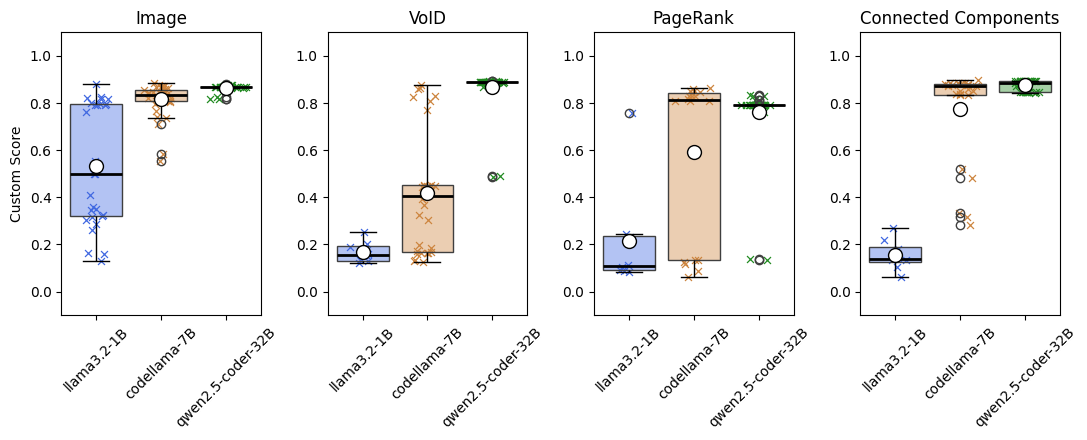

In [440]:
# Load data
image, test_case_name = image_data_enrichment()
void, test_case_name = void_data_enrichment()
page_rank, test_case_name = page_rank_data_enrichment()
connected_components, test_case_name = connected_components_data_enrichment()

model_colors = {
    'llama3.2-1B': (65/255, 105/255, 225/255, 0.4),  # Blue (unchanged)
    'codellama-7B': (205/255, 133/255, 63/255, 0.4),  # Dark Orange
    'qwen2.5-coder-32B': (34/255, 139/255, 34/255, 0.4),   # Dark Green
}

test_cases = {
    'Image': image,
    'VoID': void,
    'PageRank': page_rank,
    'Connected Components': connected_components
}

# Extract box plot data
for test_case_name, df in test_cases.items():
    df = df[["Model", "total_score"]]

# Extract box plot data and filter only the required models
model_names = set(model_colors.keys())  # Get the model names from model_colors
for test_case_name, df in test_cases.items():
    test_cases[test_case_name] = df[df["Model"].isin(model_names)][["Model", "total_score"]]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(11, 4.5), sharey=False)

# Correctly loop through zipped datasets and test case names
for idx, boxplot_data in enumerate(test_cases.values()):
    # Use seaborn for better boxplot visualization
    box = sns.boxplot(x="Model", y="total_score", 
                data=boxplot_data, 
                ax=axes[idx],
                order=['llama3.2-1B', 'codellama-7B', 'qwen2.5-coder-32B'], 
                whiskerprops=dict(color='black'), 
                capprops=dict(color='black'), 
                medianprops=dict(color='black', linewidth=2),
                showmeans=True, 
                meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=10)
                )
    
    # Apply RGBA facecolors manually to each box
    for patch, model in zip(box.patches, model_colors.keys()):
        patch.set_facecolor(model_colors[model])  # Set RGBA color

    # Formatting
    axes[idx].set_title(list(test_cases.keys())[idx])  # Set title
    axes[idx].set_xlabel(None)  # Remove x-axis label
    axes[idx].set_ylabel("Custom Score" if idx == 0 else None)  # Only set ylabel on first subplot
    axes[idx].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for readability
    axes[idx].set_ylim(-0.1, 1.1)  # Set y-axis limits


    # Overlay strip plot using scatter for individual points
    for i, model in enumerate(['llama3.2-1B', 'codellama-7B', 'qwen2.5-coder-32B']):  
        if model in boxplot_data["Model"].values:  # Check if model exists in the current test case
            y = boxplot_data[boxplot_data["Model"] == model]["total_score"].values
            jittered_x = np.random.normal(i, 0.1, size=len(y))  # Add jitter for better visibility
            axes[idx].scatter(jittered_x, y, color=model_colors[model], alpha=1, marker='x', linewidths=0.9, s=25)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig(f"{root}/combined_boxplots.png", bbox_inches="tight")

# Show plot
plt.show()

# Boxplot Single Plots

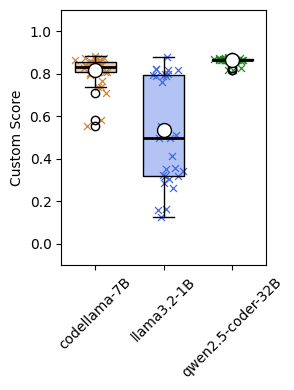

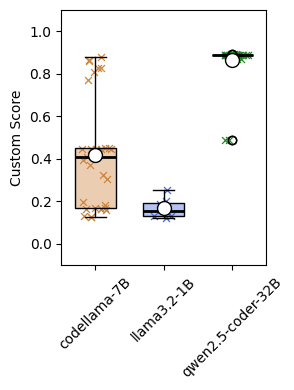

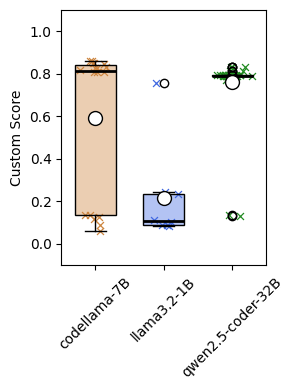

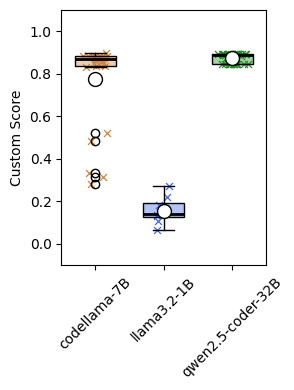

In [384]:
model_colors = {
    'llama3.2-1B': (65/255, 105/255, 225/255, 0.4),  # Blue (unchanged)
    'codellama-7B': (205/255, 133/255, 63/255, 0.4),  # Dark Orange
    'qwen2.5-coder-32B': (34/255, 139/255, 34/255, 0.4),   # Dark Green
}

# Load data
image, test_case_name = image_data_enrichment()
void, test_case_name = void_data_enrichment()
page_rank, test_case_name = page_rank_data_enrichment()
connected_components, test_case_name = connected_components_data_enrichment()

# Extract box plot data
image = image[["Model", "total_score"]]
void = void[["Model", "total_score"]]
page_rank = page_rank[["Model", "total_score"]]
connected_components = connected_components[["Model", "total_score"]]

# Extract box plot data and filter only the required models
model_names = set(model_colors.keys())  # Get the model names from model_colors

image = image[image["Model"].isin(model_names)][["Model", "total_score"]]
void = void[void["Model"].isin(model_names)][["Model", "total_score"]]
page_rank = page_rank[page_rank["Model"].isin(model_names)][["Model", "total_score"]]
connected_components = connected_components[connected_components["Model"].isin(model_names)][["Model", "total_score"]]

# Define test case names
test_cases = ["Image", "VoID", "Page_Rank", "Connected_Components"]
boxplot_datasets = [image, void, page_rank, connected_components]

for idx, boxplot_data in enumerate(boxplot_datasets):
    generate_boxplot(boxplot_data, test_cases[idx], model_colors)

# Response Time x Costum Score

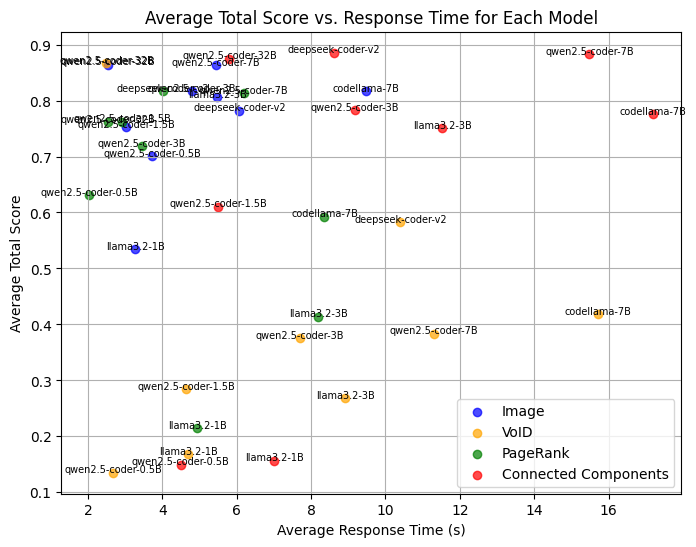

In [394]:
# Load data
image_df, test_case_name = image_data_enrichment()
void_df, test_case_name = void_data_enrichment()
page_rank_df, test_case_name = page_rank_data_enrichment()
connected_components_df, test_case_name = connected_components_data_enrichment()

# Group by model and calculate the average total_score and response time
image_average_df = image_df.groupby("Model").agg({"total_score": "mean", "LLM_Response_Time (s)": "mean"}).reset_index()
void_average_df = void_df.groupby("Model").agg({"total_score": "mean", "LLM_Response_Time (s)": "mean"}).reset_index()
page_rank_average_df = page_rank_df.groupby("Model").agg({"total_score": "mean", "LLM_Response_Time (s)": "mean"}).reset_index()
connected_components_average_df = connected_components_df.groupby("Model").agg({"total_score": "mean", "LLM_Response_Time (s)": "mean"}).reset_index()

all_average_df = {
    'Image': image_average_df, 
    'VoID': void_average_df, 
    'PageRank': page_rank_average_df,
    'Connected Components': connected_components_average_df
}

test_case_colors = {'Image': 'blue', 'VoID': 'orange', 'PageRank': 'green', 'Connected Components': 'red'}

# Filter models
if False:
    filtered_models = ['llama3.2-1B', 'llama3.2-3B']
    for df in all_average_df.values():
        df.drop(df[~df["Model"].isin(filtered_models)].index, inplace=True)

# Scatter plot
plt.figure(figsize=(8, 6))
for test_case_name, df in zip(all_average_df, all_average_df.values()):
    # Scatter plot
    plt.scatter(df["LLM_Response_Time (s)"], df["total_score"], color=test_case_colors[test_case_name], alpha=0.7, label=test_case_name)

# Add model labels to points
for df in all_average_df.values():
    for i, row in df.iterrows():
        plt.text(row["LLM_Response_Time (s)"], row["total_score"], row["Model"], fontsize=7, ha='center')

# Labels and title
plt.xlabel("Average Response Time (s)")
plt.ylabel("Average Total Score")
plt.title("Average Total Score vs. Response Time for Each Model")
plt.legend()
plt.grid(True)
plt.show()

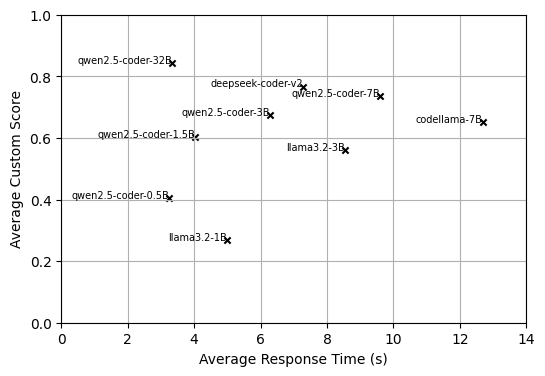

In [428]:
# Concatenate all dataframes into one
combined_df = pd.concat(all_average_df.values())

# Compute the overall average total_score and response time per model
overall_average_df = combined_df.groupby("Model").agg({
    "total_score": "mean",
    "LLM_Response_Time (s)": "mean"
}).reset_index()

# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(overall_average_df["LLM_Response_Time (s)"], overall_average_df["total_score"], color='black', marker='x', s=20)

# Add model labels
for i, row in overall_average_df.iterrows():
    plt.text(row["LLM_Response_Time (s)"], row["total_score"], row["Model"], fontsize=7, ha='right')

# Labels and title
plt.xlabel("Average Response Time (s)")
plt.ylabel("Average Custom Score")
plt.ylim(0, 1)
plt.xlim(0, 14)
plt.grid(True)

# Save the combined plot
plt.savefig(f"{root}/overall_average_total_score_vs_response_time.png")

plt.show()